In [1]:
#importing dependancies, this is a running list 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('stockdatacleaned.csv')
df

,Symbol,Date,Open,Close,High,Low,Volume
0,AAPL,2021-09-27,145.47,145.37,145.96,143.82,74150729.0
1,AAPL,2021-09-28,143.25,141.91,144.75,141.69,108972340.0
2,AAPL,2021-09-29,142.47,142.83,144.45,142.03,74602044.0
3,AAPL,2021-09-30,143.66,141.50,144.38,141.28,89056664.0
4,AAPL,2021-10-01,141.90,142.65,142.92,139.11,94639581.0
...,...,...,...,...,...,...,...
13549,ETN,2022-09-19,137.12,140.22,140.48,137.12,1372718.0
13550,ETN,2022-09-20,138.87,139.18,139.97,137.62,1621613.0
13551,ETN,2022-09-21,140.61,137.83,142.01,137.79,1112695.0
13552,ETN,2022-09-22,136.93,135.13,137.76,134.53,1871616.0


In [3]:
# Filter dataframe to pull only one stock data for the time being 
df = df[df['Symbol'] == 'AAPL']
df

,Symbol,Date,Open,Close,High,Low,Volume
0,AAPL,2021-09-27,145.47,145.37,145.96,143.82,74150729.0
1,AAPL,2021-09-28,143.25,141.91,144.75,141.69,108972340.0
2,AAPL,2021-09-29,142.47,142.83,144.45,142.03,74602044.0
3,AAPL,2021-09-30,143.66,141.50,144.38,141.28,89056664.0
4,AAPL,2021-10-01,141.90,142.65,142.92,139.11,94639581.0
...,...,...,...,...,...,...,...
246,AAPL,2022-09-19,149.31,154.48,154.56,149.10,81474246.0
247,AAPL,2022-09-20,153.40,156.90,158.08,153.08,107689796.0
248,AAPL,2022-09-21,157.34,153.72,158.74,153.60,101696790.0
249,AAPL,2022-09-22,152.38,152.74,154.47,150.91,86652542.0


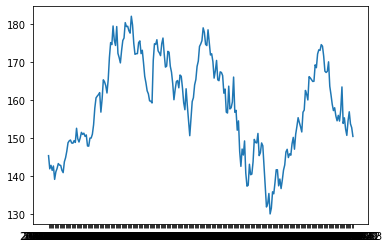

In [4]:
#plot data date vs close price to see what graph looks like 

data = df
x= df['Date']
y= df['Close']
plt.plot(x,y)
plt.show()

#very rudamentary graph, still needs titles, maybe group dates

In [5]:
# Reindex data using a DatetimeIndex
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
# Keep only the  'Close' Value
df = df[['Close']]
# Re-inspect data
print(df)

             Close
Date              
2021-09-27  145.37
2021-09-28  141.91
2021-09-29  142.83
2021-09-30  141.50
2021-10-01  142.65
...            ...
2022-09-19  154.48
2022-09-20  156.90
2022-09-21  153.72
2022-09-22  152.74
2022-09-23  150.43

[251 rows x 1 columns]


In [6]:
pip install pandas-ta

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas_ta
# Add EMA(exponential moving avg) to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df.ta.ema(close='close', length=10, append=True)
df

/var/folders/w1/n5p5h8js6651q3zf3_fsq9g40000gn/T/ipykernel_6335/2383387575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ta.ema(close='close', length=10, append=True)


,Close,EMA_10
Date,,
2021-09-27,145.37,NaN
2021-09-28,141.91,NaN
2021-09-29,142.83,NaN
2021-09-30,141.50,NaN
2021-10-01,142.65,NaN
...,...,...
2022-09-19,154.48,155.460049
2022-09-20,156.90,155.721858
2022-09-21,153.72,155.357884


In [8]:
# Drop the first n-rows (dont drop the Nan/ make the first 10 the same as the 10th, no weird edges for a continuous flow)
df = df.iloc[10:]
df

,Close,EMA_10
Date,,
2021-10-11,142.81,142.368182
2021-10-12,141.51,142.212149
2021-10-13,140.91,141.975394
2021-10-14,143.76,142.299868
2021-10-15,144.84,142.761710
...,...,...
2022-09-19,154.48,155.460049
2022-09-20,156.90,155.721858
2022-09-21,153.72,155.357884


In [9]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df[['Close']], df[['EMA_10']], test_size=.2)

#view sets
print(X_test.describe())
print(X_train.describe())

            Close
count   49.000000
mean   157.786735
std     11.405328
min    135.870000
25%    149.260000
50%    157.650000
75%    167.300000
max    177.570000
            Close
count  192.000000
mean   159.681667
std     12.376185
min    130.060000
25%    150.015000
50%    160.785000
75%    170.442500
max    182.010000


In [10]:
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [11]:
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.85468578]]
Mean Absolute Error: 3.5018774676915005
Coefficient of Determination: 0.883196544620627
